# Es_11_3


Nell'ultima parte dell'esercitazione è stato chiesto di implementare il lavoro precedente per adattare $f(x,y) = \sin(x^2+y^2)$ nell'intervallo $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$. <br>
Abbiamo fondamentalmente usato la stessa rete, adattandola per accettare un tensore bidimensionale come input. È stata scelta come funzione di attivazione Selu, l'ottimizatore adam, la loss LogCosh() con la metrica mse.

<ipython-input-6-51c259afe5de>:36: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


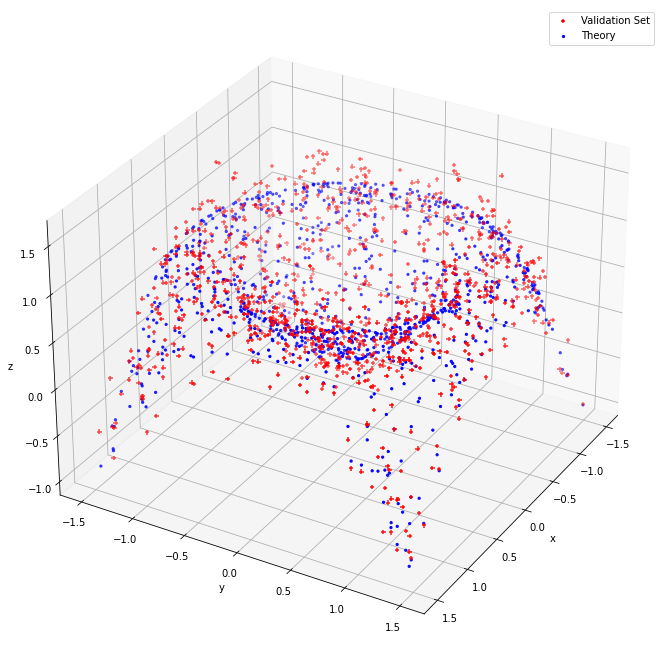

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def s(x,y):
    return np.sin(x**2.+y**2.)
plt.rcParams['figure.figsize'] = [16,9]
# generate training inputs
np.random.seed(0)
n_data = 10000
n_validation = int(n_data*0.1)
x_train = np.zeros((n_data,2))
x_valid = np.zeros((n_validation,2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, n_data)
x_train[:,1] = np.random.uniform(-1.5, 1.5, n_data)
x_valid[:,0] = np.random.uniform(-1.5, 1.5, n_validation)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, n_validation)

#y_target=np.zeros((2,n_data))
sigma = 0.2
y_train = np.random.normal(s(x_train[:,0],x_train[:,1]), sigma)
y_valid = np.random.normal(s(x_valid[:,0],x_valid[:,1]), sigma)


from mpl_toolkits.mplot3d import Axes3D
X = x_valid[:,0]
Y = x_valid[:,1]
z = y_valid
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, z, marker="+", color="red", label="Validation Set")

Z = s(X,Y)
ax.scatter(X, Y, Z, marker=".", color="blue", label="Theory")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
plt.legend()
plt.show()

In [7]:
# compose the NN model

model = tf.keras.Sequential()

n_layer = 4

#x_train=x_train.transpose()
#x_valid=x_valid.transpose()
#y_train.reshape(1,10000)
#y_valid.reshape(1,1000)

model.add(Dense(4,input_shape=(2,),activation='selu'))

for i in range (n_layer):
    model.add(Dense(4,activation='selu'))

model.add(Dense(1))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss=tf.keras.losses.LogCosh(), metrics=['mse'])

# get a summary of our composed model
model.summary()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
__________________________________________________________

In [8]:
# fit the model using training dataset
# over 30 epochs of 8 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=8, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3005 - mse: 0.3005 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 2/100
1250/1250 [==============================] - 1s 945us/step - loss: 0.1672 - mse: 0.1672 - val_loss: 0.1204 - val_mse: 0.1204
Epoch 3/100
1250/1250 [==============================] - 1s 874us/step - loss: 0.1252 - mse: 0.1252 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 4/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.0761 - val_mse: 0.0761
Epoch 5/100
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 6/100
1250/1250 [==============================] - 1s 946us/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 7/100
1250/1250 [==============================] - 1s 905us/step - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 8/100
1250/1250 [========================

32/32 [==============================] - 0s 1ms/step - loss: 0.0498 - mse: 0.0498

Test loss: 0.049841463565826416
Test accuracy: 0.049841463565826416


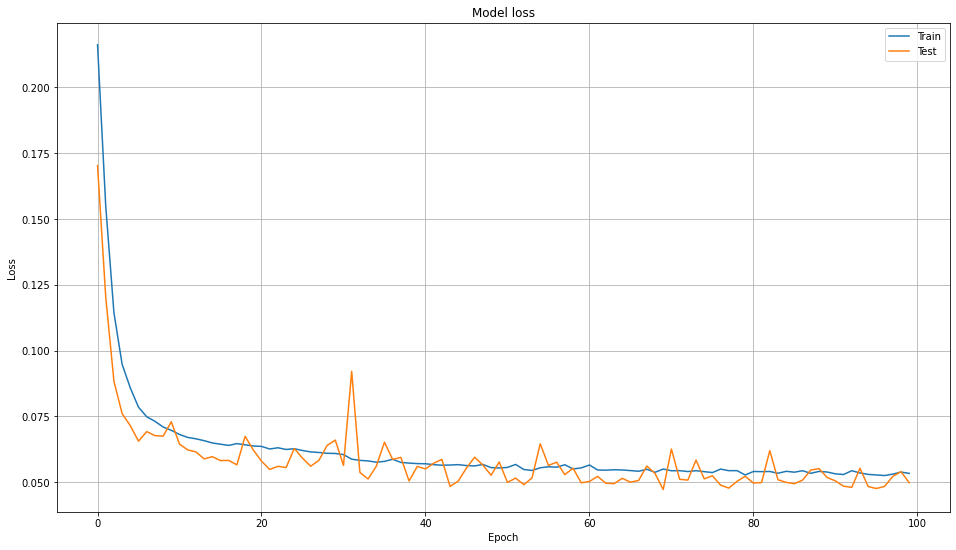

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(1)
plt.show()

<ipython-input-20-fc765f2efb96>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


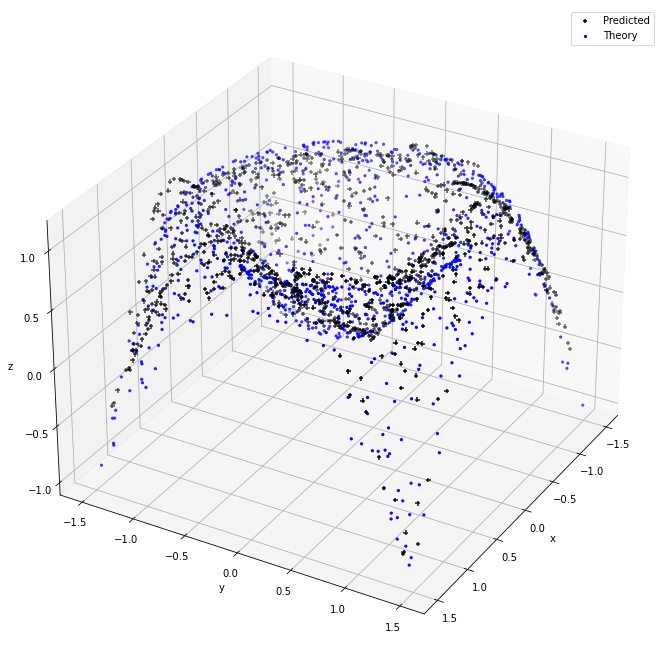

In [20]:
x_predicted=np.zeros((1000,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 1000)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = model.predict(x_predicted)

X = x_predicted[:,0]
Y = x_predicted[:,1]
Z = y_predicted
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker="+", color="k", label="Predicted")
X = x_valid[:,0]
Y = x_valid[:,1]
Z = s(X,Y)
ax.scatter(X, Y, Z, marker='.',color="blue", label="Theory")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
plt.legend()
plt.show()